<a href="https://colab.research.google.com/github/gapv09/AEIOU/blob/main/Caf%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Modelo SARIMA para la producción de Café peruano


El café peruano es reconocido a nivel mundial por su calidad y diversidad de perfiles de sabor, resultado de las diversas condiciones geográficas y climáticas del país. Perú es uno de los mayores productores de café en América Latina y ocupa un lugar destacado a nivel global, con una producción centrada en la variedad arábica, que representa casi el 100% del café cultivado en el país.

**Zonas de Producción**

Las principales zonas productoras de café en Perú se encuentran en la vertiente oriental de los Andes, especialmente en regiones como Cajamarca, Junín, San Martín, Amazonas y Cusco. Estas áreas, con altitudes que varían entre los 800 y 2,000 metros sobre el nivel del mar, proporcionan condiciones ideales para el cultivo de café de especialidad, que es valorado por sus características distintivas de sabor y aroma.

**Características de la Producción**


*   Superficie cultivada: Perú cuenta con más de 400,000 hectáreas dedicadas al cultivo de café, involucrando a más de 220,000 familias en su producción.
*   Diversidad: Debido a las condiciones climáticas y geográficas, el café peruano tiene una gran diversidad de perfiles de sabor, que van desde notas afrutadas y florales hasta sabores achocolatados.
*   Producción orgánica: Perú es uno de los mayores exportadores de café orgánico en el mundo. Muchas fincas de café en el país operan con métodos sostenibles y están certificadas como orgánicas, lo que agrega valor en los mercados internacionales.

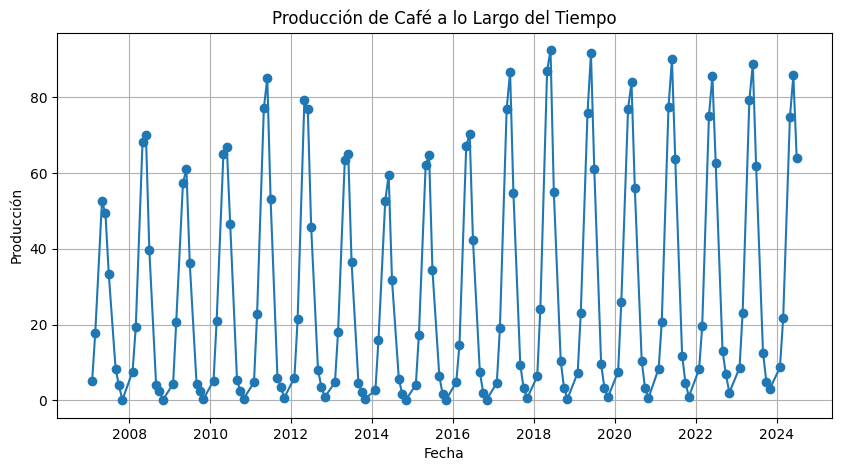

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo subido
ruta_archivo = '/content/Cafe.xlsx'   

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Graficar la serie de tiempo
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Producción'], marker='o')
plt.title('Producción de Café a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Producción')
plt.grid(True)
plt.show()

1. **Estacionalidad**:
   - El gráfico revela un patrón estacional muy marcado, con picos de producción repetidos en intervalos regulares. Esto indica que la producción de café tiene un componente estacional, probablemente relacionado con el ciclo agrícola del café, que depende de factores como la temporada de lluvias y el clima.
   - Estos picos ocurren una vez al año, lo que sugiere una **estacionalidad anual**, típica en productos agrícolas.

2. **Tendencia**:
   - Aunque la producción anual fluctúa considerablemente, parece haber una **tendencia creciente general**. A lo largo de los años, los picos de producción alcanzan valores cada vez más altos, especialmente entre 2016 y 2024.
   - Esta tendencia positiva puede indicar un crecimiento en la capacidad de producción, posiblemente impulsado por mejoras en las técnicas agrícolas, expansión de áreas de cultivo o programas de apoyo a los caficultores.

3. **Variabilidad**:
   - La variabilidad de la producción es alta, con caídas drásticas después de cada pico. Esto es normal en cultivos estacionales, donde la producción máxima se logra en ciertos meses y luego disminuye significativamente en otros.
   - La diferencia entre los picos y los puntos bajos sugiere que las condiciones de producción pueden ser muy dependientes de factores ambientales o de manejo agrícola específicos de cada año.

4. **Año atípico**:
   - En algunos años, como 2018 y 2020, los picos son particularmente altos en comparación con otros años. Esto podría deberse a condiciones climáticas excepcionales, políticas agrícolas específicas o cambios en la demanda del mercado.

### Conclusión:

Este gráfico muestra una producción de café que sigue un patrón anual con una tendencia al alza a lo largo del tiempo. Los picos de producción reflejan una clara estacionalidad agrícola, mientras que la tendencia creciente sugiere un aumento en la producción o mejoras en la industria cafetalera. Sin embargo, la alta variabilidad anual también indica que la producción está sujeta a factores externos y posiblemente impredecibles, como el clima o plagas, que afectan la cantidad cosechada cada año.

# 1. Identificación

Prueba ADF para la serie original:
Estadístico ADF: -1.7419263633223325
p-valor: 0.40965040226936056

Prueba ADF para la serie diferenciada en primer orden:
Estadístico ADF: -5.785248633867447
p-valor: 5.016980402851298e-07

Prueba ADF para la serie diferenciada en segundo orden:
Estadístico ADF: -6.124318566192723
p-valor: 8.702961328960679e-08


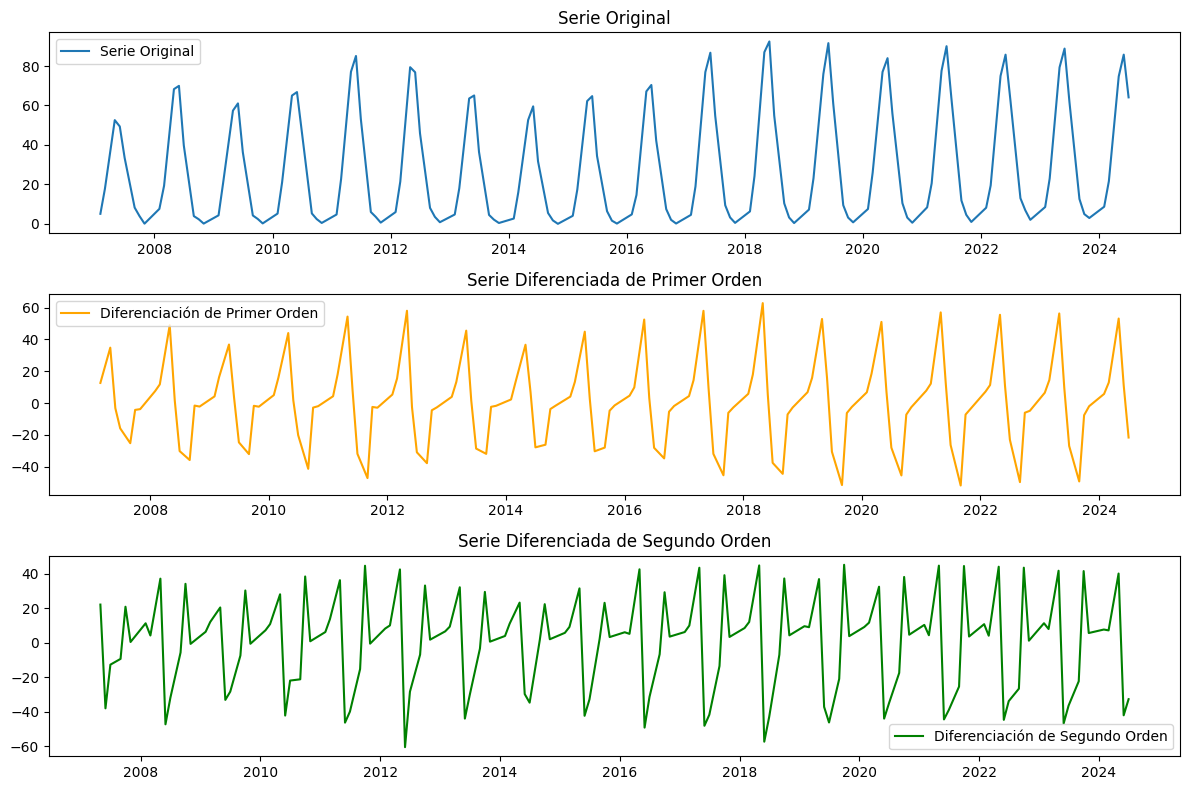

In [16]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de ADF en la serie original
result = adfuller(df['Producción'])
print("Prueba ADF para la serie original:")
print(f"Estadístico ADF: {result[0]}")
print(f"p-valor: {result[1]}")

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff()
result_1d = adfuller(df['Producción_1d'].dropna())
print("\nPrueba ADF para la serie diferenciada en primer orden:")
print(f"Estadístico ADF: {result_1d[0]}")
print(f"p-valor: {result_1d[1]}")

# Diferenciación de segundo orden
df['Producción_2d'] = df['Producción_1d'].diff()
result_2d = adfuller(df['Producción_2d'].dropna())
print("\nPrueba ADF para la serie diferenciada en segundo orden:")
print(f"Estadístico ADF: {result_2d[0]}")
print(f"p-valor: {result_2d[1]}")

# Graficar las series original, diferenciada en primer orden y en segundo orden
plt.figure(figsize=(12, 8))

# Serie original
plt.subplot(3, 1, 1)
plt.plot(df['Producción'], label='Serie Original')
plt.title('Serie Original')
plt.legend()

# Serie diferenciada en primer orden
plt.subplot(3, 1, 2)
plt.plot(df['Producción_1d'], color='orange', label='Diferenciación de Primer Orden')
plt.title('Serie Diferenciada de Primer Orden')
plt.legend()

# Serie diferenciada en segundo orden
plt.subplot(3, 1, 3)
plt.plot(df['Producción_2d'], color='green', label='Diferenciación de Segundo Orden')
plt.title('Serie Diferenciada de Segundo Orden')
plt.legend()

plt.tight_layout()
plt.show()


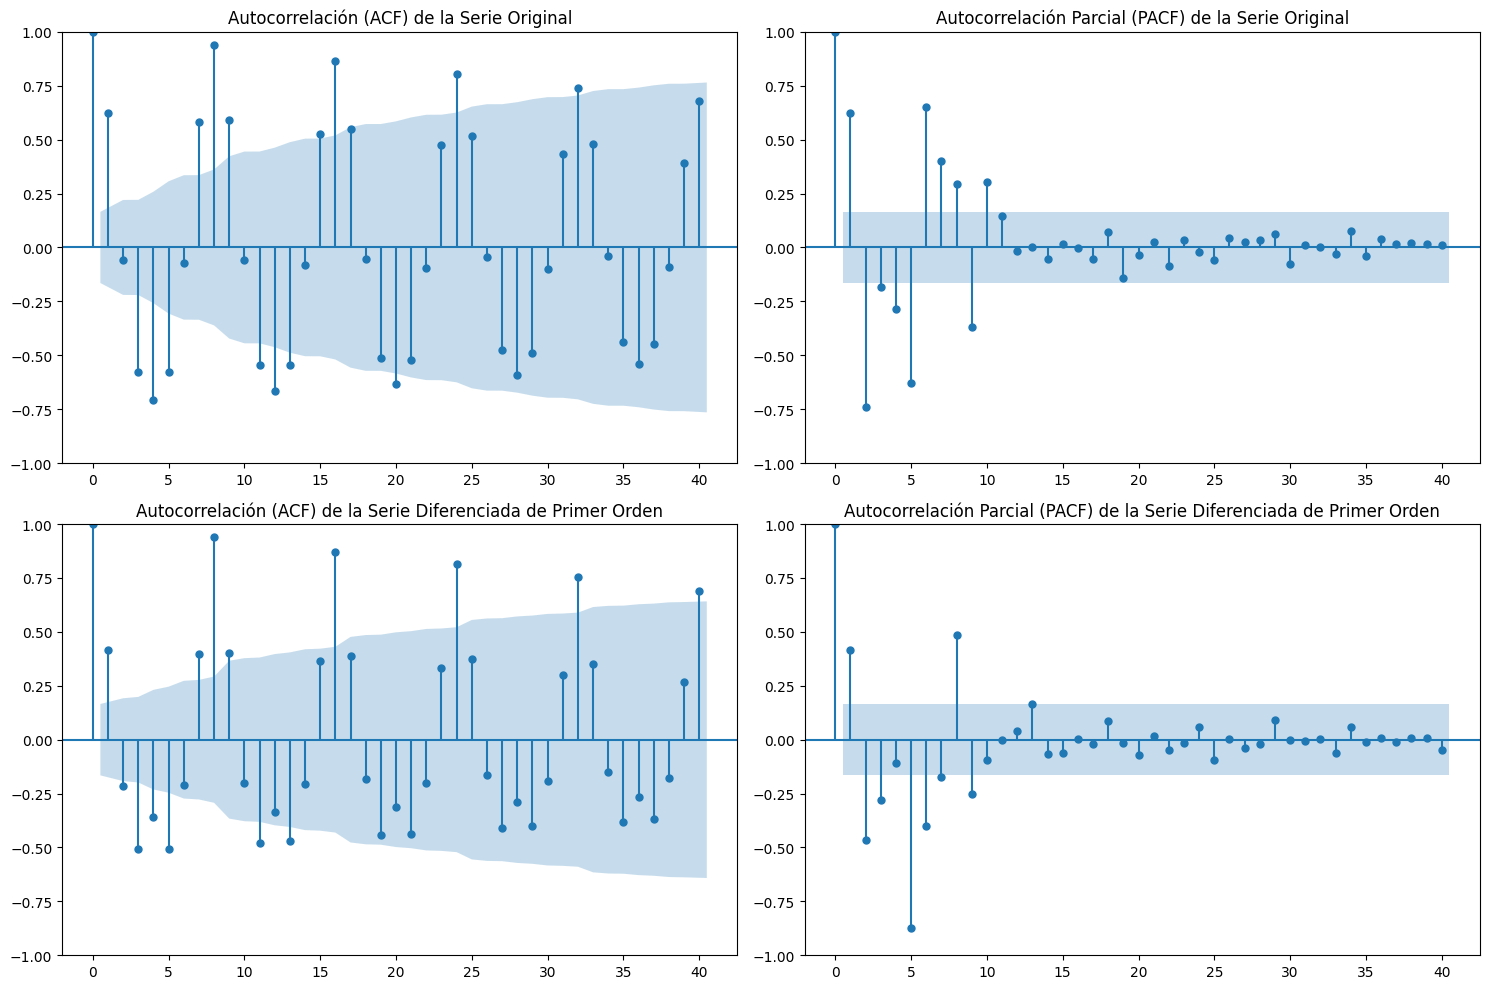

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff()

# Graficar la ACF y PACF de la serie original y la serie diferenciada
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# ACF de la serie original
plot_acf(df['Producción'].dropna(), ax=axs[0, 0], lags=40)
axs[0, 0].set_title('Autocorrelación (ACF) de la Serie Original')

# PACF de la serie original
plot_pacf(df['Producción'].dropna(), ax=axs[0, 1], lags=40)
axs[0, 1].set_title('Autocorrelación Parcial (PACF) de la Serie Original')

# ACF de la serie diferenciada
plot_acf(df['Producción_1d'].dropna(), ax=axs[1, 0], lags=40)
axs[1, 0].set_title('Autocorrelación (ACF) de la Serie Diferenciada de Primer Orden')

# PACF de la serie diferenciada
plot_pacf(df['Producción_1d'].dropna(), ax=axs[1, 1], lags=40)
axs[1, 1].set_title('Autocorrelación Parcial (PACF) de la Serie Diferenciada de Primer Orden')

plt.tight_layout()
plt.show()

Acorde a la función de autocorrelación parcial , el valor óptimo para el parámetro  p es 0. Sin embargo, se va a asignar un valor de 1 para proporcionar un componente autorregresivo al modelo. En cuanto al componente  q, la función de autocorrelación sugiere un valor de 1.

## Resumen del análisis

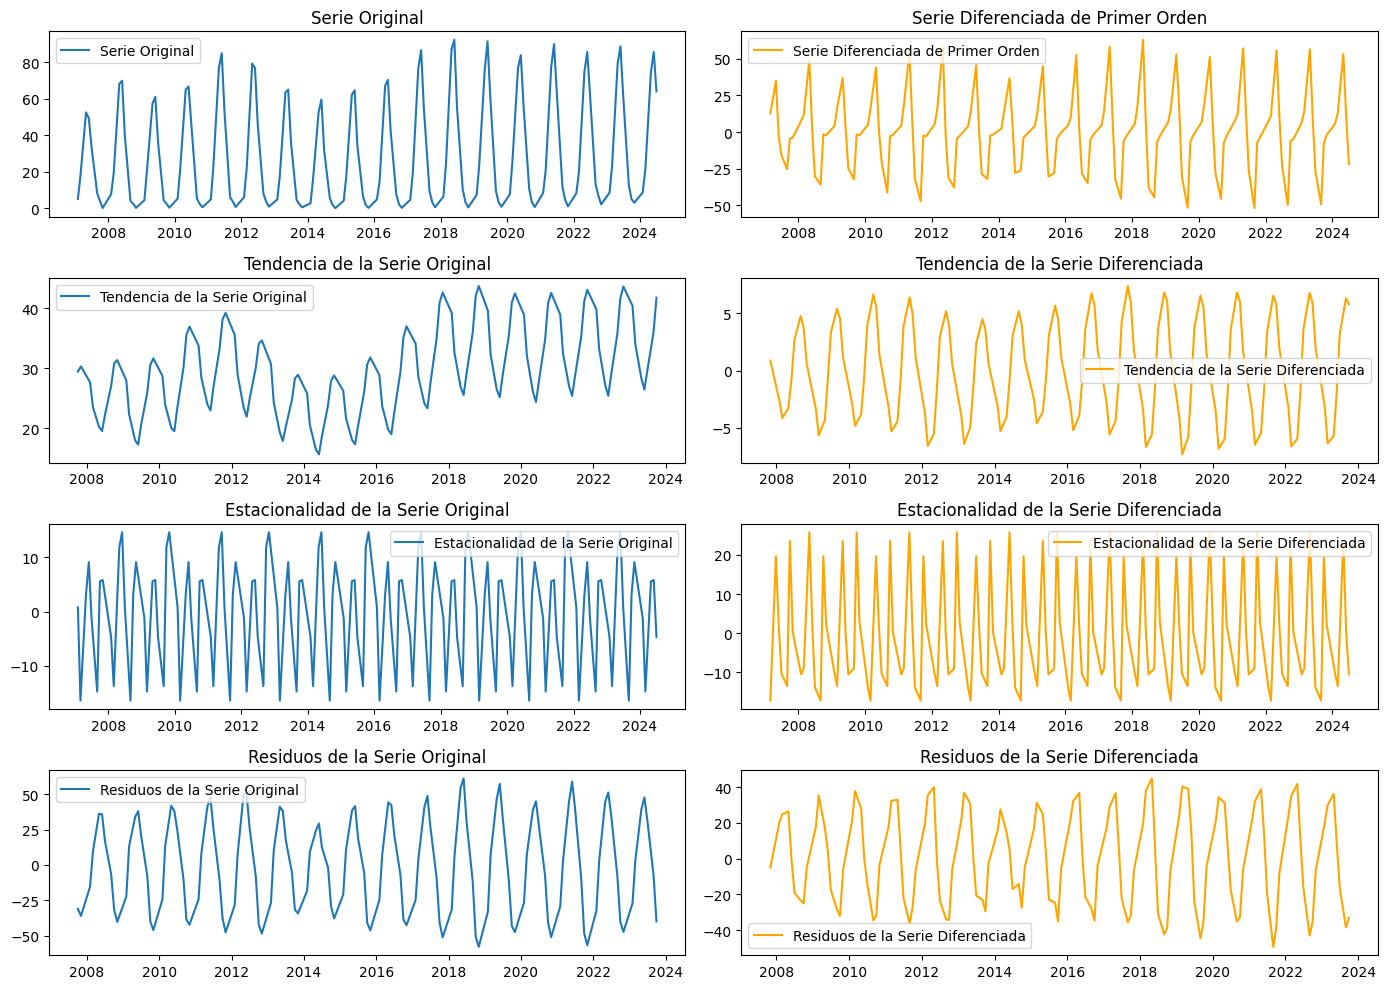

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff().dropna()

# Descomposición de la serie original
decomposition_original = seasonal_decompose(df['Producción'].dropna(), model='additive', period=12)
# Descomposición de la serie diferenciada en primer orden
decomposition_differenced = seasonal_decompose(df['Producción_1d'].dropna(), model='additive', period=12)

# Gráfico de descomposición de la serie original
plt.figure(figsize=(14, 10))

plt.subplot(4, 2, 1)
plt.plot(df['Producción'], label='Serie Original')
plt.title('Serie Original')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(decomposition_original.trend, label='Tendencia de la Serie Original')
plt.title('Tendencia de la Serie Original')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(decomposition_original.seasonal, label='Estacionalidad de la Serie Original')
plt.title('Estacionalidad de la Serie Original')
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(decomposition_original.resid, label='Residuos de la Serie Original')
plt.title('Residuos de la Serie Original')
plt.legend()

# Gráfico de descomposición de la serie diferenciada
plt.subplot(4, 2, 2)
plt.plot(df['Producción_1d'], color='orange', label='Serie Diferenciada de Primer Orden')
plt.title('Serie Diferenciada de Primer Orden')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(decomposition_differenced.trend, color='orange', label='Tendencia de la Serie Diferenciada')
plt.title('Tendencia de la Serie Diferenciada')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(decomposition_differenced.seasonal, color='orange', label='Estacionalidad de la Serie Diferenciada')
plt.title('Estacionalidad de la Serie Diferenciada')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(decomposition_differenced.resid, color='orange', label='Residuos de la Serie Diferenciada')
plt.title('Residuos de la Serie Diferenciada')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller, kpss

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff().dropna()

# Aplicar la prueba ADF a la serie diferenciada de primer orden
adf_result = adfuller(df['Producción_1d'].dropna())
print("Prueba Dickey-Fuller Aumentada (ADF) para la serie diferenciada de primer orden:")
print(f"Estadístico ADF: {adf_result[0]}")
print(f"p-valor: {adf_result[1]}")
print(f"Valores críticos: {adf_result[4]}")

# Aplicar la prueba KPSS a la serie diferenciada de primer orden
kpss_result = kpss(df['Producción_1d'].dropna(), regression='c', nlags="auto")
print("\nPrueba KPSS para la serie diferenciada de primer orden:")
print(f"Estadístico KPSS: {kpss_result[0]}")
print(f"p-valor: {kpss_result[1]}")
print(f"Valores críticos: {kpss_result[3]}")

Prueba Dickey-Fuller Aumentada (ADF) para la serie diferenciada de primer orden:
Estadístico ADF: -5.785248633867447
p-valor: 5.016980402851298e-07
Valores críticos: {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}

Prueba KPSS para la serie diferenciada de primer orden:
Estadístico KPSS: 0.011520028228773644
p-valor: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-19-39e641c76e4c>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df['Producción_1d'].dropna(), regression='c', nlags="auto")


A partir de los resultados de las pruebas ADF y KPSS, podemos interpretar la estacionariedad de la serie de producción agrícola de café en miles de toneladas, diferenciada en primer orden:

### Prueba Dickey-Fuller Aumentada (ADF)
- **Estadístico ADF**: -5.785
- **p-valor**: 5.02e-07 (o 0.000000502)
- **Valores críticos**:
  - Nivel del 1%: -3.480
  - Nivel del 5%: -2.883
  - Nivel del 10%: -2.578

**Interpretación**:
- El estadístico ADF (-5.785) es menor que los valores críticos en los niveles del 1%, 5% y 10%, lo que indica que podemos rechazar la hipótesis nula de raíz unitaria.
- Dado que el p-valor es extremadamente bajo (prácticamente cero), también rechazamos la hipótesis nula de no estacionariedad.
- Esto sugiere que la serie diferenciada de primer orden es estacionaria según la prueba ADF.

### Prueba KPSS
- **Estadístico KPSS**: 0.0115
- **p-valor**: 0.1 (la prueba advierte que el p-valor real podría ser superior)
- **Valores críticos**:
  - Nivel del 10%: 0.347
  - Nivel del 5%: 0.463
  - Nivel del 2.5%: 0.574
  - Nivel del 1%: 0.739

**Interpretación**:
- El estadístico KPSS (0.0115) es considerablemente menor que los valores críticos en todos los niveles, y el p-valor es mayor que 0.1. Esto significa que no podemos rechazar la hipótesis nula de que la serie es estacionaria en torno a una media o tendencia constante.
- La advertencia en el resultado indica que el p-valor real podría ser aún mayor, lo que refuerza la evidencia de estacionariedad.

### Conclusión General
Ambas pruebas (ADF y KPSS) sugieren que la serie de producción agrícola de café diferenciada en primer orden es **estacionaria**:
- La prueba ADF, con un estadístico significativamente bajo y un p-valor prácticamente cero, indica estacionariedad.
- La prueba KPSS, con un estadístico muy bajo y un p-valor alto, sugiere que la serie es estacionaria en torno a una media o tendencia constante.

Este resultado es positivo para análisis de series temporales, ya que la serie diferenciada en primer orden podría usarse en modelos que requieren estacionariedad, como ARIMA.

## Modelo SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         Producción   No. Observations:                  141
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -437.323
Date:                            Wed, 30 Oct 2024   AIC                            884.647
Time:                                    18:12:40   BIC                            898.907
Sample:                                         0   HQIC                           890.441
                                            - 141                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7264      0.067     10.847      0.000       0.595       0.858
ma.L1         -0.9994      1.663   

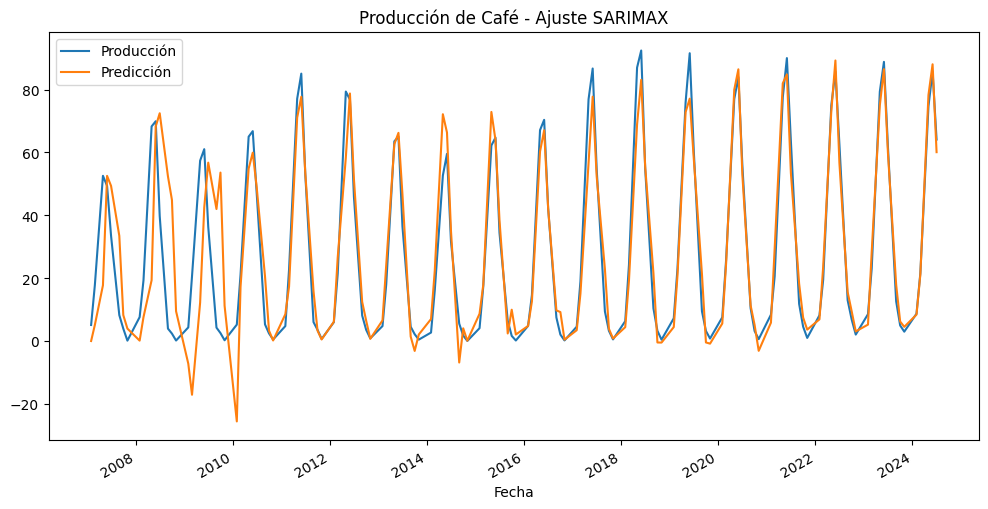

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMAX a la serie de producción agrícola de café
model = SARIMAX(df['Producción'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Mostrar el resumen de los resultados del modelo
print(results.summary())

# Graficar los ajustes y las predicciones dentro de la muestra
df['Predicción'] = results.fittedvalues
df[['Producción', 'Predicción']].plot(figsize=(12, 6), title="Producción de Café - Ajuste SARIMAX")
plt.show()

## Backtesting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dis

Error cuadrático medio (MSE): 44.945844151735876
Error absoluto medio (MAE): 5.64169621567029


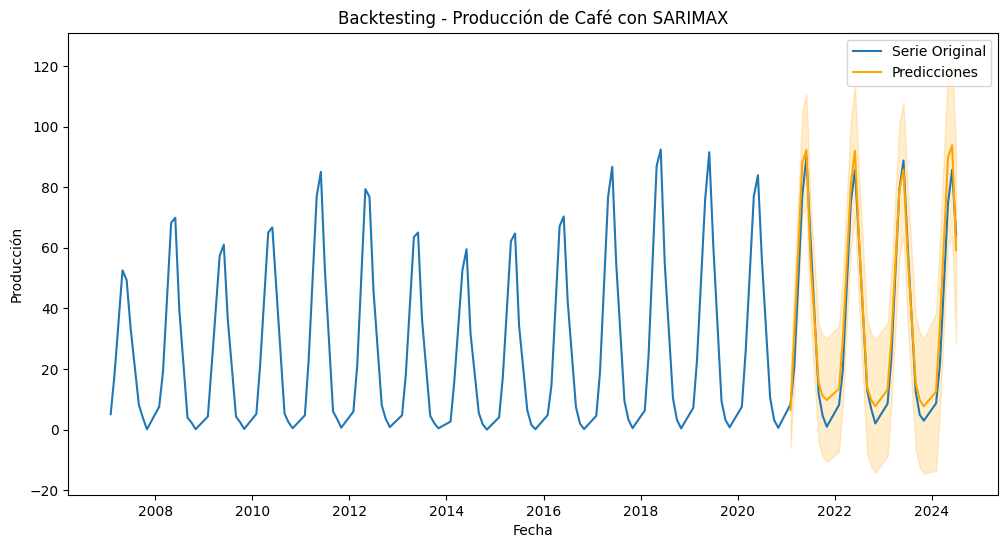

In [5]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Dividir los datos en conjunto de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Usamos el 80% de los datos para entrenamiento
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Ajustar el modelo SARIMAX en el conjunto de entrenamiento
model = SARIMAX(train['Producción'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Hacer predicciones para el conjunto de prueba
predictions = results.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Calcular el error de las predicciones
mse = mean_squared_error(test['Producción'], predicted_values)
mae = mean_absolute_error(test['Producción'], predicted_values)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")

# Graficar los datos de prueba y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción'], label='Serie Original')
plt.plot(test.index, predicted_values, label='Predicciones', color='orange')
plt.fill_between(test.index, confidence_intervals['lower Producción'], confidence_intervals['upper Producción'], color='orange', alpha=0.2)
plt.title("Backtesting - Producción de Café con SARIMAX")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

## Grid search basado en backtesting

In [6]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import numpy as np
import itertools
import warnings

warnings.filterwarnings("ignore")  # Ignorar advertencias de statsmodels


# Dividir los datos en conjunto de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Usar el 80% de los datos para entrenamiento
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Definir los rangos de parámetros para el grid search
p = d = q = range(0, 2)  # Rango de 0 a 1 para p, d, q
P = D = Q = range(0, 2)  # Rango de 0 a 1 para parámetros estacionales
s = 12  # Periodo estacional de 12 meses

# Generar todas las combinaciones de parámetros posibles
param_combinations = list(itertools.product(p, d, q))
seasonal_param_combinations = list(itertools.product(P, D, Q, [s]))

# Guardar los resultados
best_score = float("inf")
best_params = None

# Bucle para probar cada combinación de parámetros
for param in param_combinations:
    for seasonal_param in seasonal_param_combinations:
        try:
            # Ajustar el modelo SARIMAX con los parámetros actuales
            model = SARIMAX(train['Producción'], order=param, seasonal_order=seasonal_param)
            results = model.fit(disp=False)

            # Realizar predicciones en el conjunto de prueba
            predictions = results.get_forecast(steps=len(test))
            predicted_values = predictions.predicted_mean

            # Calcular el MAE
            mae = mean_absolute_error(test['Producción'], predicted_values)

            # Guardar el mejor modelo si tiene el menor MAE
            if mae < best_score:
                best_score = mae
                best_params = (param, seasonal_param)

            print(f"Params: {param} x {seasonal_param} - MAE: {mae}")

        except Exception as e:
            continue

print(f"\nMejores parámetros: order={best_params[0]}, seasonal_order={best_params[1]}")
print(f"Mejor MAE: {best_score}")

Params: (0, 0, 0) x (0, 0, 0, 12) - MAE: 37.50816937931034
Params: (0, 0, 0) x (0, 0, 1, 12) - MAE: 37.25866641113357
Params: (0, 0, 0) x (0, 1, 0, 12) - MAE: 33.721913620689655
Params: (0, 0, 0) x (0, 1, 1, 12) - MAE: 28.465375073072465
Params: (0, 0, 0) x (1, 0, 0, 12) - MAE: 36.97371358331245
Params: (0, 0, 0) x (1, 0, 1, 12) - MAE: 28.896091147605542
Params: (0, 0, 0) x (1, 1, 0, 12) - MAE: 3.131973771245409
Params: (0, 0, 0) x (1, 1, 1, 12) - MAE: 3.341535374384758
Params: (0, 0, 1) x (0, 0, 0, 12) - MAE: 37.69733562513179
Params: (0, 0, 1) x (0, 0, 1, 12) - MAE: 37.45249520288473
Params: (0, 0, 1) x (0, 1, 0, 12) - MAE: 32.15761481364528
Params: (0, 0, 1) x (0, 1, 1, 12) - MAE: 27.84696280312241
Params: (0, 0, 1) x (1, 0, 0, 12) - MAE: 37.27527641953716
Params: (0, 0, 1) x (1, 0, 1, 12) - MAE: 28.149938009534207
Params: (0, 0, 1) x (1, 1, 0, 12) - MAE: 3.10521855811063
Params: (0, 0, 1) x (1, 1, 1, 12) - MAE: 2.999642003818486
Params: (0, 1, 0) x (0, 0, 0, 12) - MAE: 36.917669379

## Auto Arima

In [8]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.9 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=937.799, Time=9.67 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1365.321, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1259.441, Time=2.81 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1269.541, Time=1.56 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1459.064, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1062.469, Time=4.60 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=949.412, Time=2.79 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=5.16 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1167.813, Time=0.29 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=976.047, Time=2.40 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.85 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1152.395, Time=1.17 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC

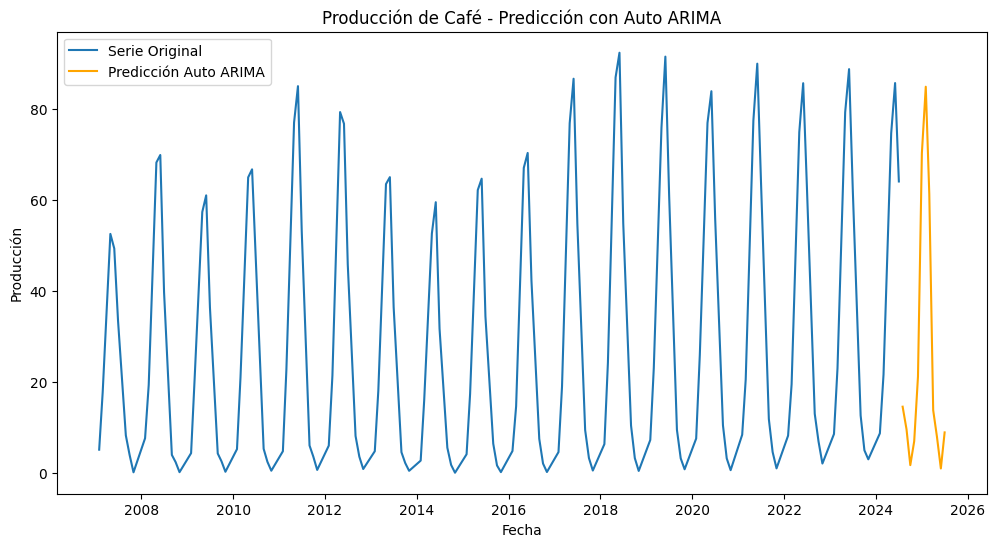

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Aplicar Auto ARIMA
auto_model = auto_arima(df['Producción'],
                        seasonal=True,
                        m=12,  # Período estacional de 12 para datos mensuales
                        trace=True,  # Mostrar el progreso de la búsqueda
                        error_action='ignore',  # Ignorar errores durante el ajuste
                        suppress_warnings=True,  # Suprimir advertencias
                        stepwise=True)  # Optimización rápida de parámetros

# Imprimir resumen del modelo encontrado
print(auto_model.summary())

# Realizar predicciones para los siguientes 12 meses (un año) como ejemplo
forecast = auto_model.predict(n_periods=12)

# Graficar la serie original y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['Producción'], label='Serie Original')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast, label='Predicción Auto ARIMA', color='orange')
plt.title("Producción de Café - Predicción con Auto ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

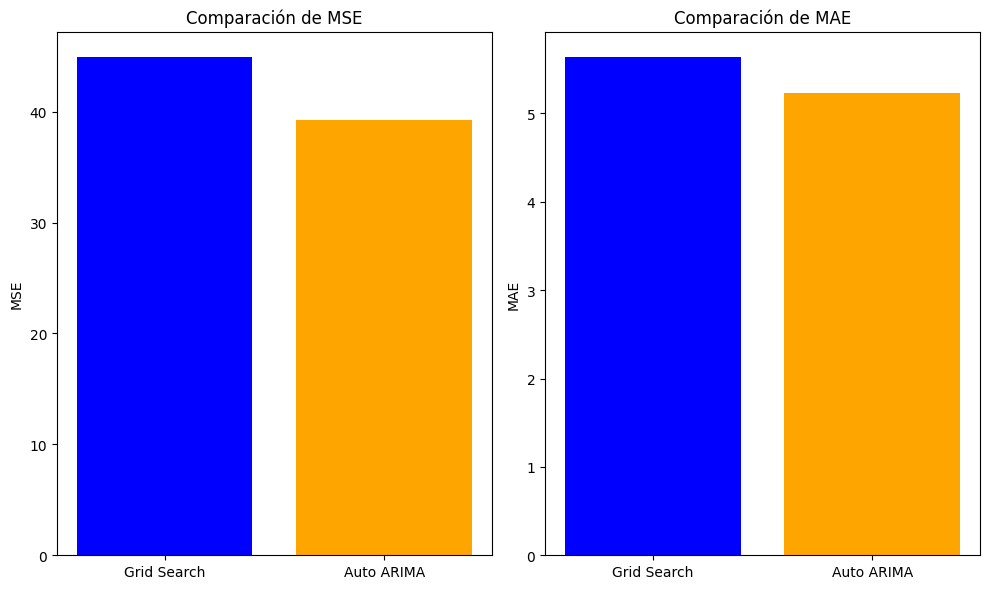

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividir los datos en conjunto de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Usar el 80% de los datos para entrenamiento
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Aplicar Grid Search con SARIMAX
model_grid = SARIMAX(train['Producción'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_grid = model_grid.fit()
predictions_grid = results_grid.get_forecast(steps=len(test)).predicted_mean

# Calcular métricas para Grid Search
mse_grid = mean_squared_error(test['Producción'], predictions_grid)
mae_grid = mean_absolute_error(test['Producción'], predictions_grid)

# Aplicar Auto ARIMA
auto_model = auto_arima(train['Producción'], seasonal=True, m=12, stepwise=True, suppress_warnings=True)
predictions_auto_arima = auto_model.predict(n_periods=len(test))

# Calcular métricas para Auto ARIMA
mse_auto_arima = mean_squared_error(test['Producción'], predictions_auto_arima)
mae_auto_arima = mean_absolute_error(test['Producción'], predictions_auto_arima)

# Comparar las métricas en un gráfico de barras
metrics_df = pd.DataFrame({
    'Modelo': ['Grid Search', 'Auto ARIMA'],
    'MSE': [mse_grid, mse_auto_arima],
    'MAE': [mae_grid, mae_auto_arima]
})

# Gráfico de comparación de métricas
plt.figure(figsize=(10, 6))

# MSE
plt.subplot(1, 2, 1)
plt.bar(metrics_df['Modelo'], metrics_df['MSE'], color=['blue', 'orange'])
plt.title('Comparación de MSE')
plt.ylabel('MSE')

# MAE
plt.subplot(1, 2, 2)
plt.bar(metrics_df['Modelo'], metrics_df['MAE'], color=['blue', 'orange'])
plt.title('Comparación de MAE')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


La configuración SARIMA identificada mediante la técnica de grid search (basada en backtesting con error medio absoluto) ofrece resultados ligeramente peores que el Auto Arima, por tanto el best model que emplearemos es el Auto ARIMA.

# 2. Estimación:

In [13]:
# Modelo SARIMA
model = SARIMAX(train['Producción'], order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  112
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -387.390
Date:                              Wed, 30 Oct 2024   AIC                            788.780
Time:                                      20:09:08   BIC                            807.810
Sample:                                           0   HQIC                           796.501
                                              - 112                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4048      0.007    191.424      0.000       1.390       1.419
ar.L2         -0.99

# 3. Chequeo

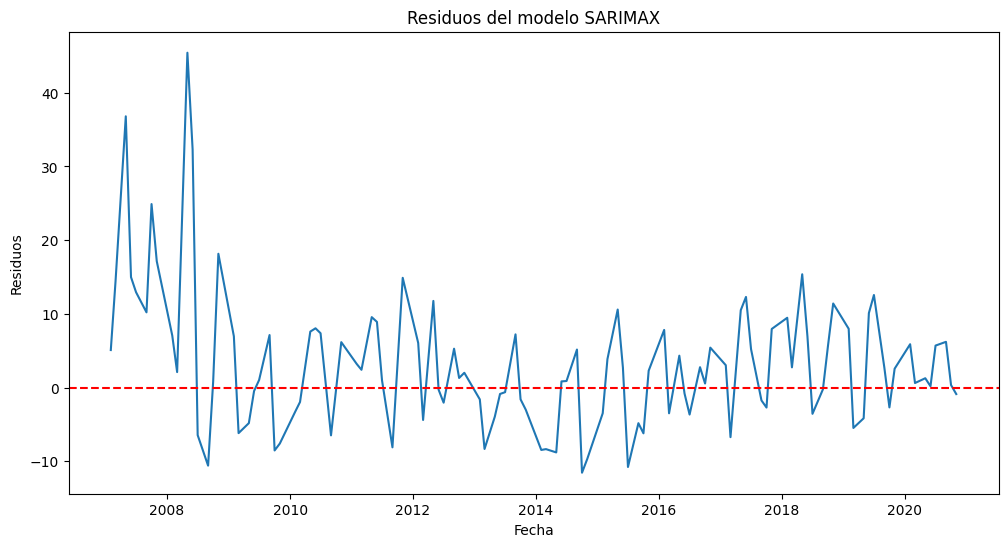

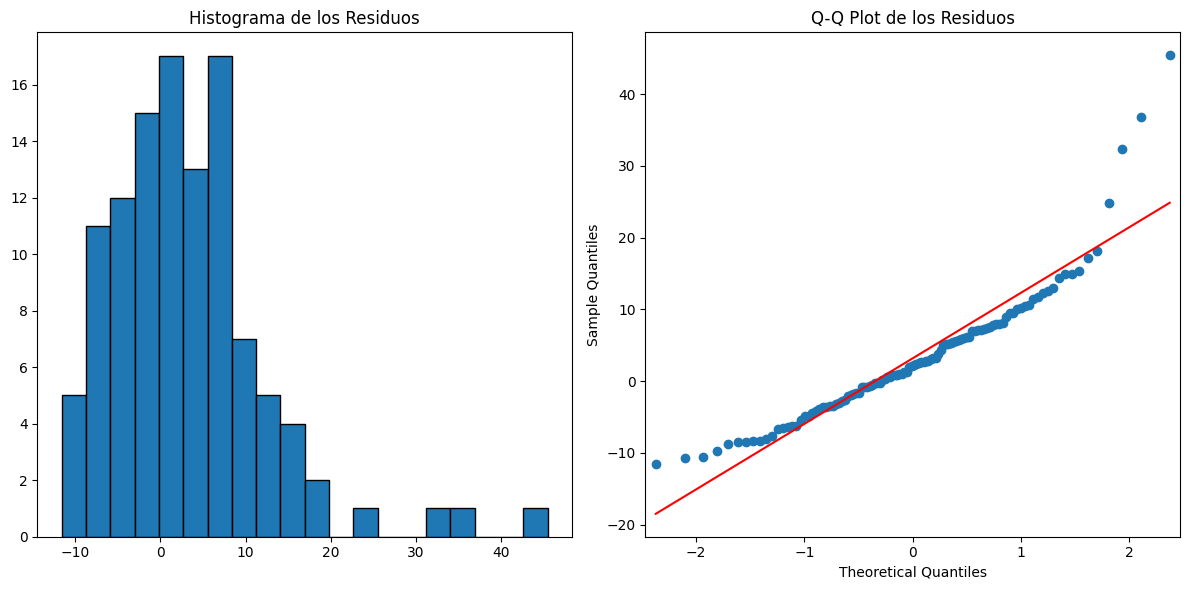

Prueba de Ljung-Box para residuos:
       lb_stat     lb_pvalue
10  69.712573  5.037982e-11
15  72.503543  1.593790e-09
20  73.459413  4.912681e-08


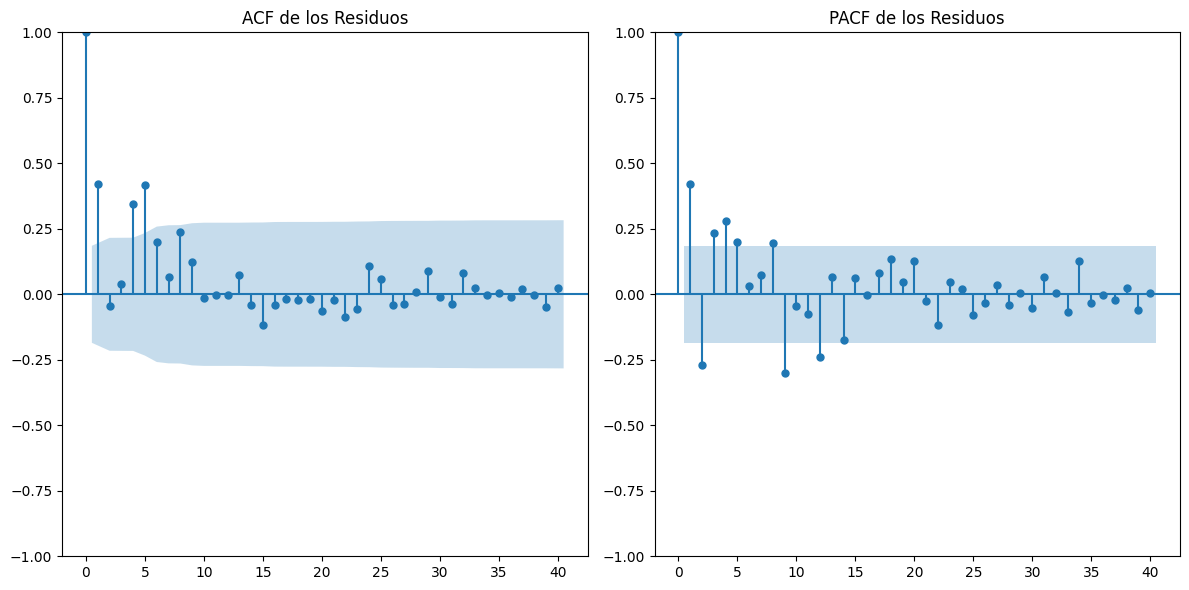

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extraer los residuos del modelo
residuals = results.resid

# Gráfico de los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del modelo SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Histograma y Q-Q plot para verificar la normalidad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histograma de los Residuos')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot de los Residuos')

plt.tight_layout()
plt.show()

# Prueba de Ljung-Box para verificar la autocorrelación de los residuos
ljung_box_result = acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Prueba de Ljung-Box para residuos:\n", ljung_box_result)

# Gráficos de ACF y PACF de los residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF de los Residuos')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF de los Residuos')

plt.tight_layout()
plt.show()

#### 1. Gráfico ACF (Autocorrelación de los Residuos)
- En el gráfico de ACF, la mayoría de los puntos de autocorrelación caen dentro de la banda de confianza, excepto algunos rezagos en las primeras posiciones (principalmente en los primeros 5 rezagos).
- Idealmente, si los residuos fueran completamente ruido blanco (es decir, sin autocorrelación), todos los puntos de autocorrelación deberían caer dentro del intervalo de confianza.
- La presencia de algunos valores fuera del intervalo de confianza en los primeros rezagos podría indicar que hay algún patrón en los residuos no capturado completamente por el modelo. Sin embargo, dado que la mayoría de los rezagos caen dentro de las bandas de confianza, el modelo captura razonablemente bien la estructura de la serie.

#### 2. Gráfico PACF (Autocorrelación Parcial de los Residuos)
- En el gráfico de PACF, se observa una situación similar a la ACF: algunos rezagos iniciales están fuera del intervalo de confianza, especialmente en los primeros 10 rezagos.
- Esto sugiere que, aunque el modelo ha capturado gran parte de la estructura de la serie temporal, existen patrones residuales en los primeros rezagos que no han sido completamente explicados.
- Si estos patrones fueran significativos, indicaría que el modelo necesita ajustar parámetros adicionales o considerar un orden diferente para capturar estos rezagos.

#### 3. Prueba de Ljung-Box para Residuos
- La prueba de **Ljung-Box** evalúa si los residuos tienen autocorrelación significativa en diferentes rezagos (10, 15, y 20 en este caso).
- Los valores p (p-value) obtenidos son muy bajos (cercanos a cero), lo que indica que **rechazamos la hipótesis nula de que los residuos son ruido blanco**. Esto significa que aún existe autocorrelación en los residuos y sugiere que el modelo no captura completamente todas las dependencias de la serie temporal.

### Conclusión:
- **Autocorrelación Residual**: La presencia de algunos valores significativos en el ACF y PACF de los residuos, junto con los resultados de la prueba de Ljung-Box, sugiere que el modelo SARIMAX actual no ha capturado completamente la estructura de la serie de producción de café. Es posible que sea necesario ajustar el modelo, ya sea incrementando el orden de los componentes AR o MA, o considerando una estructura estacional diferente.
- **Posibles Mejoras**: Dado que los residuos aún presentan autocorrelación, puedes considerar probar otros valores para los parámetros estacionales o no estacionales. También podrías explorar un enfoque de modelado diferente o incluir variables adicionales para mejorar el ajuste.

En resumen, aunque el modelo actual captura gran parte de la estructura, los resultados indican que aún existen patrones no capturados. Por lo tanto, se recomienda un ajuste adicional del modelo para reducir la autocorrelación residual.

# 4. Predicción

Error cuadrático medio (MSE): 55.29115485988907
Error absoluto medio (MAE): 5.639925958571422


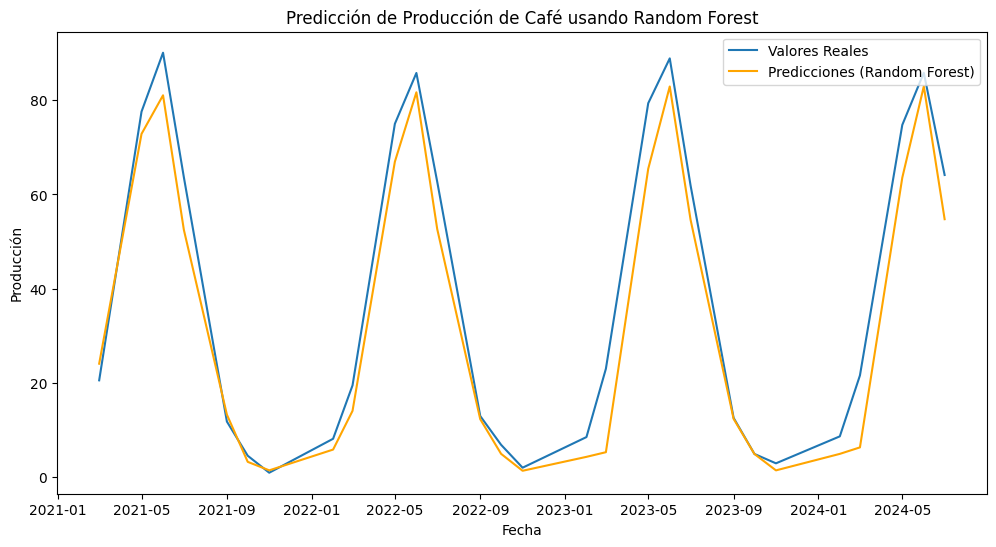

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Generar características de rezago (lags) para usar en el modelo
df['Producción_Lag1'] = df['Producción'].shift(1)
df['Producción_Lag2'] = df['Producción'].shift(2)
df['Producción_Lag3'] = df['Producción'].shift(3)
df.dropna(inplace=True)  # Eliminar filas con valores NaN debido a los lags

# Separar las características (X) y la variable objetivo (y)
X = df[['Producción_Lag1', 'Producción_Lag2', 'Producción_Lag3']]
y = df['Producción']

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular métricas de error
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Valores Reales')
plt.plot(y_test.index, predictions, label='Predicciones (Random Forest)', color='orange')
plt.title("Predicción de Producción de Café usando Random Forest")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()



#### 1. Identificación de la Estacionalidad y Tendencia
- En este gráfico, se observa una **clara estacionalidad anual** en los datos de producción de café, con picos recurrentes en los mismos períodos de cada año (aproximadamente a mitad de año).
- El modelo de Random Forest parece haber capturado esta estacionalidad de manera efectiva, ya que las predicciones siguen el mismo patrón estacional de los datos reales.
- No parece haber una tendencia significativa en los últimos años; la serie muestra un comportamiento cíclico sin una tendencia a largo plazo hacia el crecimiento o la disminución.

#### 2. Estimación del Modelo
- La estimación del modelo parece adecuada, ya que el modelo Random Forest está capturando bien los picos y las caídas estacionales de la serie. La precisión del ajuste sugiere que el modelo ha sido entrenado correctamente para entender los patrones anuales de producción.

#### 3. Diagnóstico del Modelo
- Aunque este gráfico no muestra los residuos explícitamente, podemos inferir que existen ligeras desviaciones entre los valores reales y las predicciones, especialmente en los picos y valles. Estas diferencias indican que el modelo no captura perfectamente los valores extremos, aunque sigue de cerca el patrón general.
- Sería útil calcular y analizar los residuos para verificar si el modelo deja autocorrelación significativa o si los residuos son aleatorios. Esto indicaría si el modelo necesita ajustes adicionales.

### Conclusión
En términos de la teoría de Box-Jenkins, el modelo de **Random Forest** aquí mostrado ha capturado adecuadamente los patrones de **estacionalidad** en la serie de producción de café, con un buen ajuste a los picos y valles de producción. Sin embargo, el modelo presenta algunas limitaciones para ajustarse con precisión a los valores extremos, lo cual es común en modelos de Machine Learning cuando se aplican a series temporales sin componentes explícitos de estacionalidad.